In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import logging

In [3]:
logging.basicConfig(level = logging.INFO,
                    filename = "project2_logging.log",
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    datefmt = '%Y-%m-%d %H-%M-%S')

## Train data

In [4]:
df = pd.read_excel('Data_Train.xlsx')

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
logging.info('Dataset loaded')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
logging.info('Dropped null values')

In [11]:
df.duplicated().sum()

220

In [12]:
duplicates = df[df.duplicated()]
duplicates

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [13]:
df1=df.copy()

In [14]:
# Removing duplicate rows
df1 = df1.drop_duplicates(keep = 'first')

In [15]:
logging.info('Dropped duplicates')

In [16]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [17]:
df1["Date_of_Journey"] = pd.to_datetime(df1["Date_of_Journey"])

In [18]:
df1["Date"]= pd.to_datetime(df1['Date_of_Journey'], format= "%d/%m/%Y").dt.day
df1["Month"]= pd.to_datetime(df1['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [19]:
df1['Total_Stops'].replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
                        [0, 1, 2, 3, 4], inplace=True)

In [20]:
df1['New_duration'] = (pd.to_timedelta(df1['Duration']).dt.seconds // 60).astype(int)

In [21]:
# Extracting Hour from departure time
df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour

# Extracting Minute from departure time
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute

In [22]:
logging.info('Extracted hour and minute from departure time')

In [23]:
df1.drop(["Additional_Info","Route", "Date_of_Journey", "Duration", "Dep_Time", "Arrival_Time"], inplace = True, axis=1)

In [24]:
logging.info('Dropped columns')

In [25]:
df1 = df1.rename(columns = {"New_duration": "Duration_mins"})

In [26]:
df1

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Duration_mins,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,170,22,20
1,Air India,Kolkata,Banglore,2,7662,5,1,445,5,50
2,Jet Airways,Delhi,Cochin,2,13882,6,9,1140,9,25
3,IndiGo,Kolkata,Banglore,1,6218,5,12,325,18,5
4,IndiGo,Banglore,New Delhi,1,13302,3,1,285,16,50
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,4,9,150,19,55
10679,Air India,Kolkata,Banglore,0,4145,27,4,155,20,45
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,180,8,20
10681,Vistara,Banglore,New Delhi,0,12648,3,1,160,11,30


In [27]:
df1.describe()

,Total_Stops,Price,Date,Month,Duration_mins,Dep_hour,Dep_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,0.802332,9026.790289,12.630090,5.534601,484.295068,12.478494,24.404989
std,0.660609,4624.849541,8.791635,2.995344,376.409619,5.727227,18.815719
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,5.000000,3.000000,165.000000,8.000000,5.000000
50%,1.000000,8266.000000,6.000000,5.000000,375.000000,11.000000,25.000000
75%,1.000000,12344.750000,21.000000,6.000000,745.000000,18.000000,40.000000
max,4.000000,79512.000000,27.000000,12.000000,1435.000000,23.000000,55.000000


In [28]:
df1 = df1.reindex(columns = [col for col in df1.columns if col != 'Price'] + ['Price'])

In [29]:
df1

,Airline,Source,Destination,Total_Stops,Date,Month,Duration_mins,Dep_hour,Dep_min,Price
0,IndiGo,Banglore,New Delhi,0,24,3,170,22,20,3897
1,Air India,Kolkata,Banglore,2,5,1,445,5,50,7662
2,Jet Airways,Delhi,Cochin,2,6,9,1140,9,25,13882
3,IndiGo,Kolkata,Banglore,1,5,12,325,18,5,6218
4,IndiGo,Banglore,New Delhi,1,3,1,285,16,50,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4,9,150,19,55,4107
10679,Air India,Kolkata,Banglore,0,27,4,155,20,45,4145
10680,Jet Airways,Banglore,Delhi,0,27,4,180,8,20,7229
10681,Vistara,Banglore,New Delhi,0,3,1,160,11,30,12648


In [30]:
cat_features=[i for i in df1.columns if df1.dtypes[i]=='object']

In [31]:
cat_features

['Airline', 'Source', 'Destination']

In [32]:
num_features=[i for i in df1.columns if df1.dtypes[i]=='int64']

In [33]:
num_features

['Total_Stops', 'Date', 'Month', 'Dep_hour', 'Dep_min', 'Price']

In [34]:
for col in cat_features:
    print(df1[col].value_counts())
    print('----------------------------')

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------------
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64
----------------------------
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
----------------------------


"New Delhi" and "Delhi" both exist under Destination

In [35]:
des_combine = (df1['Destination'] == "New Delhi") 
df1.loc[des_combine, 'Destination'] = "Delhi"
df1['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [36]:
logging.info('Combined similar destinations')

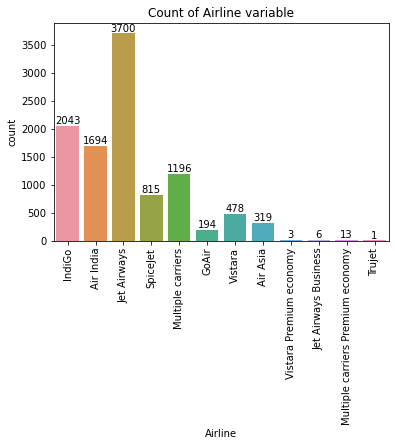

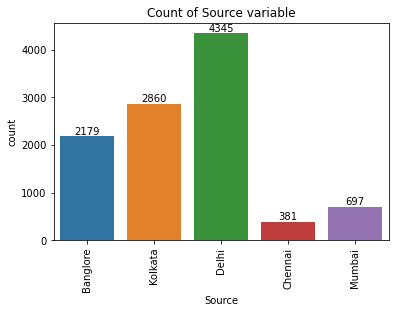

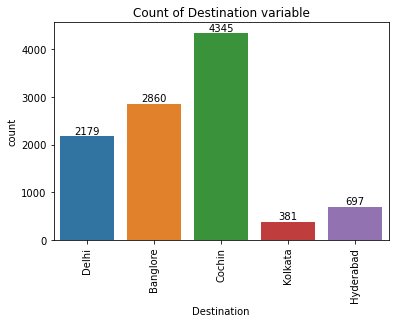

In [37]:
for col in cat_features:
    plt.title('Count of {0} variable'.format(col))
    ax = sns.countplot(data = df1, x = col)
    plt.xticks(rotation=90)
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.show()

Jet Airways is the most chosen flight for inter state travel, Flights from Delhi and Flights to Cochin are the highest

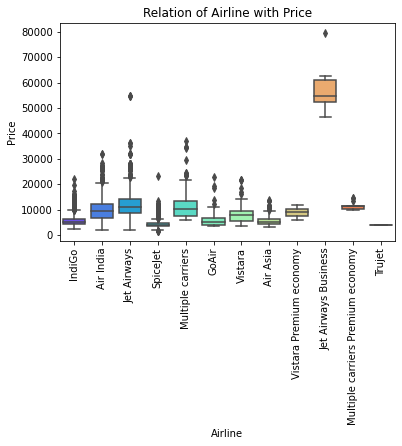

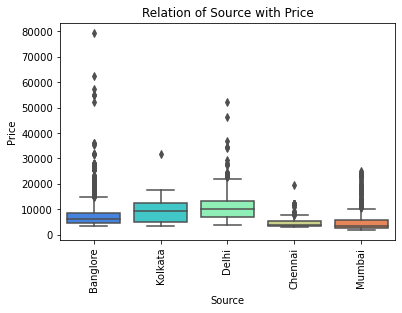

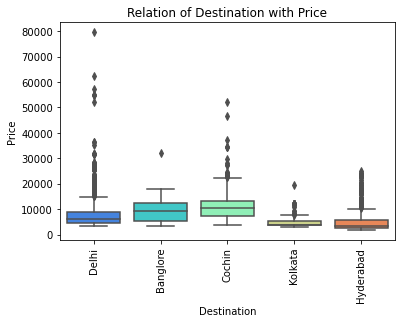

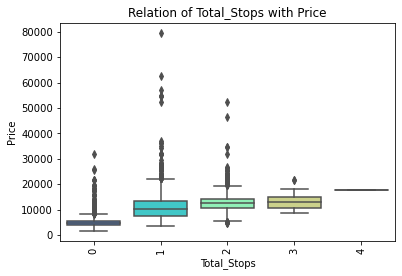

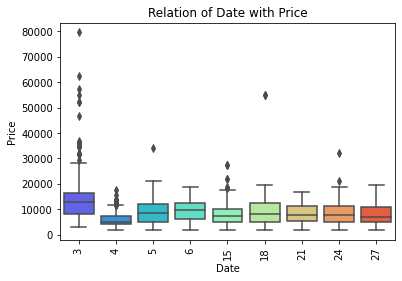

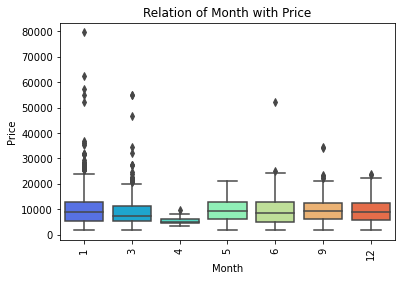

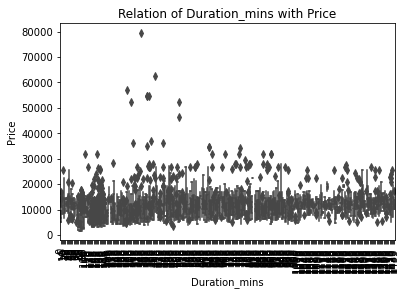

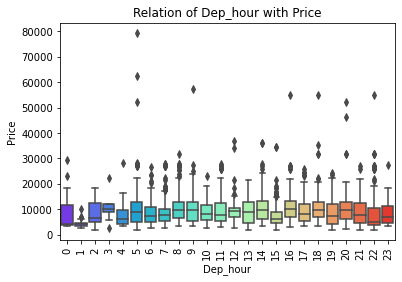

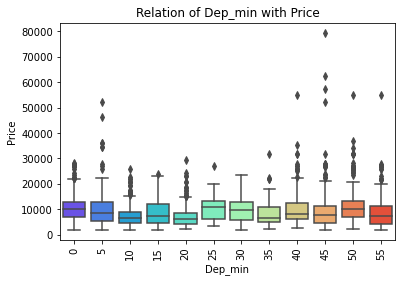

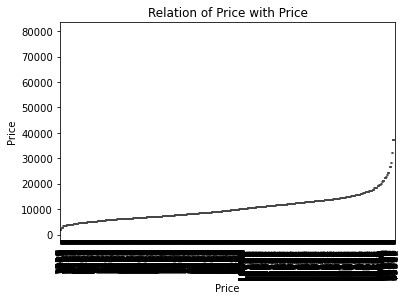

In [38]:
for col in df1.columns:
    plt.title('Relation of {0} with Price'.format(col))
    sns.boxplot(x= col, y='Price', data=df1, palette='rainbow')
    plt.xticks(rotation=90) 
    plt.show()

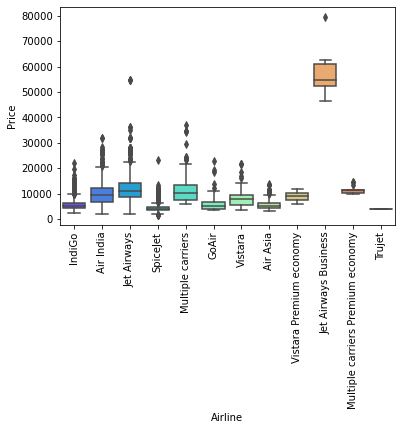

In [39]:
sns.boxplot(x='Airline',y='Price',data=df1,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

Jet Airways Business have the highest rates for flight tickets

<AxesSubplot:xlabel='Source', ylabel='Price'>

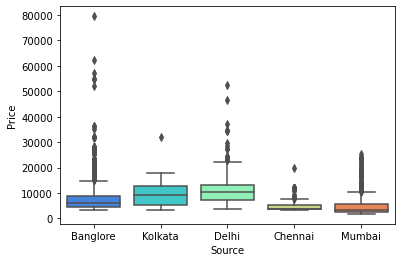

In [40]:
sns.boxplot(x='Source',y='Price',data=df1,palette='rainbow')

Flights from Delhi seem to have a higher price than other sources

<AxesSubplot:xlabel='Destination', ylabel='Price'>

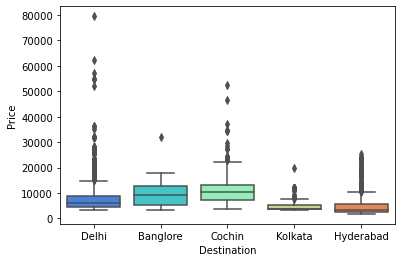

In [41]:
sns.boxplot(x='Destination',y='Price',data=df1,palette='rainbow')

Flights to Cochin seem to have a higher price than other destinations

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

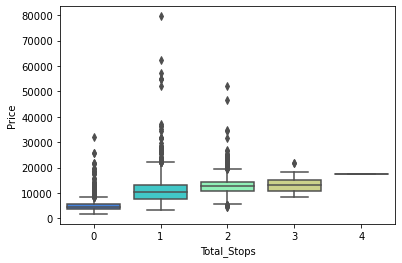

In [42]:
sns.boxplot(x='Total_Stops',y='Price',data=df1,palette='rainbow')

As can be seen above, More the stops more the price

<AxesSubplot:xlabel='Month', ylabel='Price'>

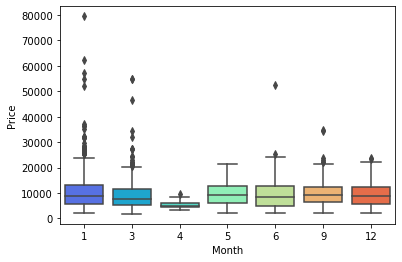

In [43]:
sns.boxplot(x='Month',y='Price',data=df1,palette='rainbow')

<AxesSubplot:>

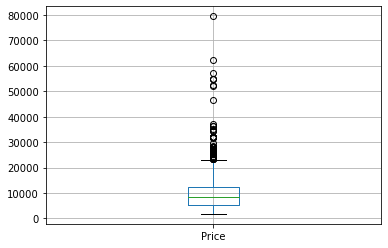

In [44]:
df1.boxplot(column=['Price'])

In [45]:
df1.loc[df1['Price'] > 40000]

,Airline,Source,Destination,Total_Stops,Date,Month,Duration_mins,Dep_hour,Dep_min,Price
657,Jet Airways Business,Banglore,Delhi,1,3,1,300,5,45,52229
1478,Jet Airways,Banglore,Delhi,1,18,3,365,18,40,54826
2618,Jet Airways,Banglore,Delhi,1,18,3,375,22,50,54826
2924,Jet Airways Business,Banglore,Delhi,1,3,1,340,5,45,79512
5372,Jet Airways Business,Banglore,Delhi,1,3,1,400,5,45,62427
5439,Jet Airways,Banglore,Delhi,1,3,1,365,16,55,54826
7351,Jet Airways Business,Delhi,Cochin,2,3,3,500,20,5,46490
9715,Jet Airways Business,Delhi,Cochin,2,3,6,500,20,5,52285
10364,Jet Airways Business,Banglore,Delhi,1,3,1,280,9,45,57209


Jet Airways and Jet Airways Business charges flyers at high rates for flight tickets

In [46]:
df1[df1['Airline'].isin(['Jet Airways', 'Jet Airways Business']) ]

,Airline,Source,Destination,Total_Stops,Date,Month,Duration_mins,Dep_hour,Dep_min,Price
2,Jet Airways,Delhi,Cochin,2,6,9,1140,9,25,13882
6,Jet Airways,Banglore,Delhi,1,3,12,930,18,55,11087
7,Jet Airways,Banglore,Delhi,1,3,1,1265,8,0,22270
8,Jet Airways,Banglore,Delhi,1,3,12,90,8,55,11087
13,Jet Airways,Kolkata,Banglore,1,5,9,730,21,10,9663
...,...,...,...,...,...,...,...,...,...,...
10666,Jet Airways,Delhi,Cochin,1,6,12,45,18,15,10262
10667,Jet Airways,Banglore,Delhi,1,3,12,1285,22,55,11087
10668,Jet Airways,Delhi,Cochin,2,5,9,440,11,40,21219
10674,Jet Airways,Banglore,Delhi,1,3,12,45,20,35,11087


In [47]:
df1[df1['Airline'].str.contains('Jet Airways Business')]

,Airline,Source,Destination,Total_Stops,Date,Month,Duration_mins,Dep_hour,Dep_min,Price
657,Jet Airways Business,Banglore,Delhi,1,3,1,300,5,45,52229
2924,Jet Airways Business,Banglore,Delhi,1,3,1,340,5,45,79512
5372,Jet Airways Business,Banglore,Delhi,1,3,1,400,5,45,62427
7351,Jet Airways Business,Delhi,Cochin,2,3,3,500,20,5,46490
9715,Jet Airways Business,Delhi,Cochin,2,3,6,500,20,5,52285
10364,Jet Airways Business,Banglore,Delhi,1,3,1,280,9,45,57209


Jet Airways Business class flight tickets tend to be on the higher side

It was found that "Trujet" is not present in the list of airlines in the test dataset. So it would be best to remove it from the training dataset as it contains only 1 instance of this airline and it would also cause problems when encoding the airlines column.

In [48]:
df1 =df1[df1['Airline'] != 'Trujet']

In [49]:
df1['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [50]:
df_copy = df1.copy()

In [51]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
df_copy['Airline'] = le1.fit_transform(df_copy['Airline']) 
df_copy['Source'] = le2.fit_transform(df_copy['Source'])
df_copy['Destination'] = le3.fit_transform(df_copy['Destination'])

In [52]:
le_name_mapping = dict(zip(le1.classes_, le1.transform(le1.classes_)))
print(le_name_mapping)

{'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Vistara': 9, 'Vistara Premium economy': 10}


In [53]:
le_name_mapping1 = dict(zip(le2.classes_, le2.transform(le2.classes_)))
print(le_name_mapping1)

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}


In [54]:
le_name_mapping2 = dict(zip(le3.classes_, le3.transform(le3.classes_)))
print(le_name_mapping2)

{'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4}


In [55]:
logging.info('Encoded categorical variables')

In [56]:
df_copy

,Airline,Source,Destination,Total_Stops,Date,Month,Duration_mins,Dep_hour,Dep_min,Price
0,3,0,2,0,24,3,170,22,20,3897
1,1,3,0,2,5,1,445,5,50,7662
2,4,2,1,2,6,9,1140,9,25,13882
3,3,3,0,1,5,12,325,18,5,6218
4,3,0,2,1,3,1,285,16,50,13302
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4,9,150,19,55,4107
10679,1,3,0,0,27,4,155,20,45,4145
10680,4,0,2,0,27,4,180,8,20,7229
10681,9,0,2,0,3,1,160,11,30,12648


In [57]:
df_copy.drop(['Duration_mins'], axis =1, inplace = True)

In [58]:
df_train = df_copy.copy()

In [59]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Date', 'Month',
       'Dep_hour', 'Dep_min', 'Price'],
      dtype='object')

## Test data

In [60]:
df3 = pd.read_excel("Test_set.xlsx")

In [61]:
df3

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [62]:
print("Info")
print(df3.info())
print("----------------")

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
----------------


In [63]:
print("Null Values")
print(df3.isnull().sum())
df3.dropna(inplace = True)
print("----------------")

Null Values
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
----------------


In [64]:
df4 = df3.copy()

df4 = df4.drop_duplicates(keep = 'first')

df4["Date_of_Journey"] = pd.to_datetime(df4["Date_of_Journey"])
df4["Date"]= pd.to_datetime(df4['Date_of_Journey'], format= "%d/%m/%Y").dt.day
df4["Month"]= pd.to_datetime(df4['Date_of_Journey'], format= "%d/%m/%Y").dt.month
df4['Total_Stops'].replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
                        [0, 1, 2, 3, 4], inplace=True)
# Extracting Hour from departure time
df4["Dep_hour"] = pd.to_datetime(df3["Dep_Time"]).dt.hour

# Extracting Minute from departure time
df4["Dep_min"] = pd.to_datetime(df4["Dep_Time"]).dt.minute
df4.drop(["Additional_Info","Route", "Date_of_Journey", "Duration", "Dep_Time", "Arrival_Time"], inplace = True, axis=1)

des1_combine = (df4['Destination'] == "New Delhi") 
df4.loc[des1_combine, 'Destination'] = "Delhi"

In [65]:
logging.info('Applied pre-processing steps on test dataset')

In [66]:
cat1_features=[i for i in df4.columns if df1.dtypes[i]=='object']

In [67]:
for col in cat1_features:
    print(df4[col].value_counts())
    print('----------------------------')

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
----------------------------
Delhi       1127
Kolkata      707
Banglore     550
Mumbai       186
Chennai       75
Name: Source, dtype: int64
----------------------------
Cochin       1127
Banglore      707
Delhi         550
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
----------------------------


In [68]:
df1_copy = df4.copy()

In [69]:
df1_copy

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30
1,IndiGo,Kolkata,Banglore,1,5,12,6,20
2,Jet Airways,Delhi,Cochin,1,21,5,19,15
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55
...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20
2668,Jet Airways,Delhi,Cochin,1,3,6,21,50
2669,Air India,Delhi,Cochin,1,3,6,4,0


In [70]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
df1_copy['Airline'] = le1.fit_transform(df1_copy['Airline']) 
df1_copy['Source'] = le2.fit_transform(df1_copy['Source'])
df1_copy['Destination'] = le3.fit_transform(df1_copy['Destination'])

In [71]:
le_name_mapping3 = dict(zip(le1.classes_, le1.transform(le1.classes_)))
print(le_name_mapping3)

{'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Vistara': 9, 'Vistara Premium economy': 10}


In [72]:
le_name_mapping4 = dict(zip(le2.classes_, le2.transform(le2.classes_)))
print(le_name_mapping4)

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}


In [73]:
le_name_mapping5 = dict(zip(le3.classes_, le3.transform(le3.classes_)))
print(le_name_mapping5)

{'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4}


In [74]:
df_test = df1_copy.copy()

In [75]:
df_test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Date', 'Month',
       'Dep_hour', 'Dep_min'],
      dtype='object')

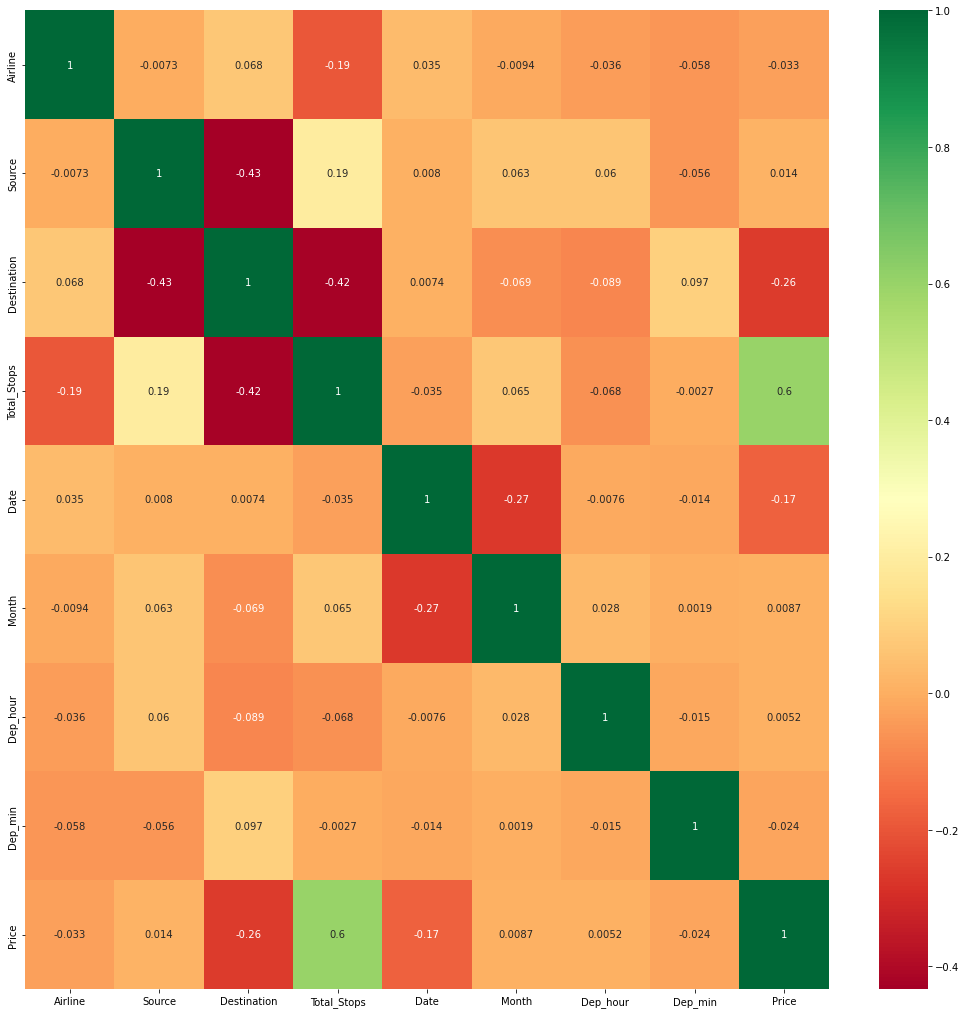

In [76]:
plt.figure(figsize = (18,18))
sns.heatmap(df_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [77]:
df_final = pd.concat([df_train, df_test])

In [78]:
df_final

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hour,Dep_min,Price
0,3,0,2,0,24,3,22,20,3897.0
1,1,3,0,2,5,1,5,50,7662.0
2,4,2,1,2,6,9,9,25,13882.0
3,3,3,0,1,5,12,18,5,6218.0
4,3,0,2,1,3,1,16,50,13302.0
...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,30,NaN
2667,3,3,0,0,27,3,14,20,NaN
2668,4,2,1,1,3,6,21,50,NaN
2669,1,2,1,1,3,6,4,0,NaN


In [79]:
train_clean = df_final[df_final['Price'].notnull()]
test_clean = df_final[df_final['Price'].isnull()]
test_clean = test_clean.drop(columns='Price')
(train_clean.shape, test_clean.shape)

((10461, 9), (2645, 8))

In [80]:
y = train_clean['Price']
X = train_clean.drop(columns='Price', axis=1)
X.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_hour,Dep_min
0,3,0,2,0,24,3,22,20
1,1,3,0,2,5,1,5,50
2,4,2,1,2,6,9,9,25
3,3,3,0,1,5,12,18,5
4,3,0,2,1,3,1,16,50


In [81]:
logging.info('Extracted dependent and independent variables for regression')

In [82]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10461, dtype: float64

1. Linear Regression

2. Decision Tree

3. Support Vector Regression

4. Lasso Regression

5. Random Forest

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

def predictions(model, name):
    new_model = model.fit(X_train, y_train)
    pred = new_model.predict(X_test)
    print("============= %s =============" %name)
    print("R2 Score: %f" %(r2_score(y_test, pred)))
    print("MSE: %f" %(mean_squared_error(y_test, pred)))
    print("MAE: %f" %(mean_absolute_error(y_test, pred)))

In [87]:
logging.info("Fitted the models on the training data")

In [88]:
lr_model = LinearRegression()
predictions(lr_model, 'Linear Regression')

============= Linear Regression =============
R2 Score: 0.440068
MSE: 10745741.668433
MAE: 2476.848814


In [89]:
rf_model = RandomForestRegressor(random_state=0)
predictions(rf_model, 'Random Forest Regressor')

============= Random Forest Regressor =============
R2 Score: 0.779971
MSE: 4222610.919032
MAE: 1238.658406


In [90]:
dt_model = DecisionTreeRegressor(random_state=0)
predictions(dt_model, 'Decision Tree Regressor')

============= Decision Tree Regressor =============
R2 Score: 0.739767
MSE: 4994176.400610
MAE: 1313.260207


In [91]:
ridge_model = Ridge()
predictions(ridge_model, 'Ridge Regressor')

============= Ridge Regressor =============
R2 Score: 0.440075
MSE: 10745609.192780
MAE: 2476.844377


In [92]:
extratree_model = ExtraTreesRegressor()
predictions(extratree_model, 'Extra tree Regressor')

============= Extra tree Regressor =============
R2 Score: 0.763918
MSE: 4530679.153767
MAE: 1274.287421


In [93]:
gradboost_model = GradientBoostingRegressor()
predictions(gradboost_model, 'Gradient Booster Regressor')

============= Gradient Booster Regressor =============
R2 Score: 0.752884
MSE: 4742443.744979
MAE: 1515.404690


In [94]:
logging.info("Made Predictions with all models")

In [95]:
import pickle
pickle.dump(rf_model, open('rf_reg_model2.pkl', 'wb'))